In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
cd /content/drive/MyDrive/Project/Mini Project/cumulative.csv

[Errno 20] Not a directory: '/content/drive/MyDrive/Project/Mini Project/cumulative.csv'
/content


In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Sklearn Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score

# Visualizes all the columns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Project/Mini Project/cumulative.csv')

# Print the shape of the dataset
print(df.shape)

# Select top of the dataset
df.head()

(9564, 50)


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

In [11]:
df = df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod[days',
'koi_period_err1':'OrbitalPeriodUpperUnc.[days',
'koi_period_err2':'OrbitalPeriodLowerUnc.[days',
'koi_time0bk':'TransitEpoch[BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc.[BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc.[BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration[hrs',
'koi_duration_err1':'TransitDurationUpperUnc.[hrs',
'koi_duration_err2':'TransitDurationLowerUnc.[hrs',
'koi_depth':'TransitDepth[ppm',
'koi_depth_err1':'TransitDepthUpperUnc.[ppm',
'koi_depth_err2':'TransitDepthLowerUnc.[ppm',
'koi_prad':'PlanetaryRadius[Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc.[Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc.[Earthradii',
'koi_teq':'EquilibriumTemperature[K',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc.[K',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc.[K',
'koi_insol':'InsolationFlux[Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc.[Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc.[Earthflux',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumbe',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature[K',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc.[K',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc.[K',
'koi_slogg':'StellarSurfaceGravity[log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc.[log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc.[log10(cm/s**2)',
'koi_srad':'StellarRadius[Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc.[Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc.[Solarradii',
'ra':'RA[decimaldegrees',
'dec':'Dec[decimaldegrees',
'koi_kepmag':'Kepler-band[mag]'
})
df.head()

,rowid,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,EquilibriumTemperatureUpperUnc.[K,EquilibriumTemperatureLowerUnc.[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,TCEDeliver,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag]
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [12]:
df['ExoplanetCandidate'] = df['DispositionUsingKeplerData'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)

In [13]:
df['ExoplanetConfirmed'] = df['ExoplanetArchiveDisposition'].apply(lambda x: 2 if x == 'CONFIRMED' else 1 if x == 'CANDIDATE' else 0 )

In [14]:
df.head()

,rowid,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,EquilibriumTemperatureUpperUnc.[K,EquilibriumTemperatureLowerUnc.[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,TCEDeliver,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetCandidate,ExoplanetConfirmed
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0,0
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1,2


In [15]:
df.drop(columns=['KeplerName','KOIName','EquilibriumTemperatureUpperUnc.[K',
                 'KepID','ExoplanetArchiveDisposition','DispositionUsingKeplerData',
                 'NotTransit-LikeFalsePositiveFlag','koi_fpflag_ss','CentroidOffsetFalsePositiveFlag',
                 'EphemerisMatchIndicatesContaminationFalsePositiveFlag','TCEDeliver',
                 'EquilibriumTemperatureLowerUnc.[K'], inplace=True)

In [16]:
df.isna().any()

rowid                                            False
DispositionScore                                  True
OrbitalPeriod[days                               False
OrbitalPeriodUpperUnc.[days                       True
OrbitalPeriodLowerUnc.[days                       True
TransitEpoch[BKJD                                False
TransitEpochUpperUnc.[BKJD                        True
TransitEpochLowerUnc.[BKJD                        True
ImpactParamete                                    True
ImpactParameterUpperUnc                           True
ImpactParameterLowerUnc                           True
TransitDuration[hrs                              False
TransitDurationUpperUnc.[hrs                      True
TransitDurationLowerUnc.[hrs                      True
TransitDepth[ppm                                  True
TransitDepthUpperUnc.[ppm                         True
TransitDepthLowerUnc.[ppm                         True
PlanetaryRadius[Earthradii                        True
PlanetaryR

In [17]:
df.dropna(inplace=True)

In [18]:
df.shape

(7803, 40)

In [19]:
df.shape
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(df)

,rowid,DispositionScore,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetCandidate,ExoplanetConfirmed
0,1.0,1.000,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1.0,2.0
1,2.0,0.969,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1.0,2.0
2,3.0,0.000,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0.0,0.0
3,4.0,0.000,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0.0,0.0
4,5.0,1.000,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560.0,0.000,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,0.63400,-0.63400,87.7,13.0,-13.0,1.11,0.32,-0.23,929.0,176.40,152.77,-77.60,8.4,1.0,5638.0,169.0,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478,0.0,0.0
9560,9561.0,0.000,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,4500.53,3406.38,-1175.26,453.3,1.0,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082,0.0,0.0
9561,9562.0,0.497,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,1585.81,1537.86,-502.22,10.6,1.0,6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757,1.0,1.0
9562,9563.0,0.021,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,5713.41,5675.74,-1836.94,12.3,1.0,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385,0.0,0.0


In [20]:
def evaluation(y_true, y_pred):
    
# Print Accuracy, Recall, F1 Score, and Precision metrics.
    print('Evaluation Metrics:')
    print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
    print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
    print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred)))
    print('Precision: ' + str(metrics.precision_score(y_test, y_pred)))
    
# Print Confusion Matrix
    print('\nConfusion Matrix:')
    print(' TN,  FP, FN, TP')
    print(confusion_matrix(y_true, y_pred).ravel())
    
# Function Prints best parameters for GridSearchCV
def print_results(results):
    print('Best Parameters: {}\n'.format(results.best_params_))

In [21]:
features = df.drop(columns=['ExoplanetCandidate','ExoplanetConfirmed'])
target = df.ExoplanetCandidate

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1, test_size=.40)

In [23]:
for dataset in [y_train, y_test]:
    print(round(len(dataset)/len(target), 2))

0.6
0.4


In [24]:
# Logistic Regression Model
lr = LogisticRegression(C=100, max_iter=200, class_weight='balanced')

# Fitting Model to the train set
lr.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr.predict(X_test)

# Evaluating model
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.8078155028827675
Recall: 0.8501275510204082
F1 Score: 0.8162890385793018
Precision: 0.7850412249705536

Confusion Matrix:
 TN,  FP, FN, TP
[1189  365  235 1333]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
tree = DecisionTreeClassifier()
# Fitting Model to the train set
tree.fit(X_train, y_train)
# Predicting on the test set
y_pred = tree.predict(X_test)
# Evaluating model
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.9807815502882767
Recall: 0.9783163265306123
F1 Score: 0.9808184143222506
Precision: 0.9833333333333333

Confusion Matrix:
 TN,  FP, FN, TP
[1528   26   34 1534]


In [26]:
# Instantiate model
forest = RandomForestClassifier(n_estimators=100, criterion='gini')
# Fitting Model to the train set
forest.fit(X_train, y_train)
# Predicting on the test set
y_pred = forest.predict(X_test)
# Evaluating model
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.9887892376681614
Recall: 0.9846938775510204
F1 Score: 0.9887928274095421
Precision: 0.9929260450160772

Confusion Matrix:
 TN,  FP, FN, TP
[1543   11   24 1544]


In [27]:
parameters = {
    'n_estimators': [5, 50, 100, 150, 200],
    'max_depth': list(range(1, 11)),
    'criterion':['gini','entropy'],
    'max_features': list(range(1,20)),
    'oob_score':[False,True],
}

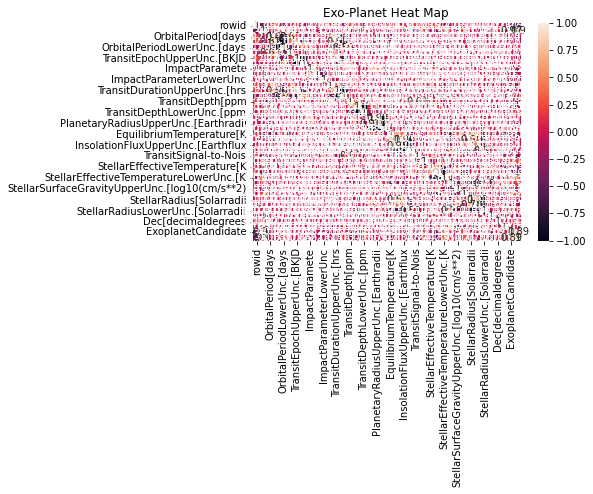

In [28]:
sns.heatmap(df.corr(), annot = True)
plt.title("Exo-Planet Heat Map ")
plt.show()